In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def makeDF(file,sex='F'):
    df = pd.read_csv(file);
    # fix column names
    df.columns=['name','s','count'];
    # get girls only 
    df = df[df['s']==sex];
    return df;

def nameCount(df,name,value='count'):
    row = df[df['name']==name];
    count = row['count'].values;
    if (len(count)==0):
        count = 0;
        rank = len(df)+1;
    else:
        count = count[0];
        rank = row.index.values[0];
    if value=='count':
        return count;
    elif value == 'relative':
        return 100*count / totalBabies(df);
    elif value=='percentile':
        return (1-rank/len(df))*100;

def totalBabies(df):
    return df.sum()['count'];
    
def nameCountBarChart(dfs,names,value='count'):
    counts = [[nameCount(df,name,value=value) for df in dfs] for name in names];
    ind = np.arange(len(dfs)) 
    width = 1/(len(names)+1);
    plt.figure(figsize=(12,6))
    for ix in range(len(names)):
        plt.bar(ind -(len(counts)-1)*width/2 + ix*width, counts[ix], width, label=names[ix])
    if value=='relative':
        plt.ylabel('% Total');
    elif value=='percentile':
        ply.ylabel('Percentile');
    else: 
        plt.ylabel('Count');
    plt.title('Name popularity by year')
    plt.xticks(ind, years)
    plt.legend(loc='best')
    plt.show()


## Baby name popularity by year

In [17]:
df2019 = makeDF('yob2019.txt')
df2019[0:10]

,name,s,count
0,Emma,F,17102
1,Ava,F,14440
2,Sophia,F,13714
3,Isabella,F,13306
4,Charlotte,F,13138
5,Amelia,F,12862
6,Mia,F,12414
7,Harper,F,10442
8,Evelyn,F,10392
9,Abigail,F,9106


In [18]:
df1880 = makeDF('yob1880.txt')
df1880[0:10]

,name,s,count
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
5,Ida,F,1472
6,Alice,F,1414
7,Bertha,F,1320
8,Sarah,F,1288
9,Annie,F,1258


In [19]:
df1960 = makeDF('yob1960.txt')
df1960[0:10]

,name,s,count
0,Susan,F,39202
1,Linda,F,37311
2,Karen,F,36379
3,Donna,F,34133
4,Lisa,F,33703
5,Patricia,F,32104
6,Debra,F,26739
7,Cynthia,F,26721
8,Deborah,F,25262
9,Sandra,F,24571


In [20]:
df2019[df2019['name']=='Charlotte']

,name,s,count
4,Charlotte,F,13138


In [21]:
df2019[df2019['name']=='Melissa']

,name,s,count
337,Melissa,F,930


In [22]:
"{:,}".format(totalBabies(df2019))

'1,646,922'

In [23]:
"{:,}".format(totalBabies(df1880))

'83,929'

## Comparing name popluatiry

In [24]:
years = [1880,1900,1920,1940,1960,1980,2000,2019];
dfs = [makeDF('yob'+str(year)+'.txt') for year in years]
dfsM = [makeDF('yob'+str(year)+'.txt',sex='M') for year in years]

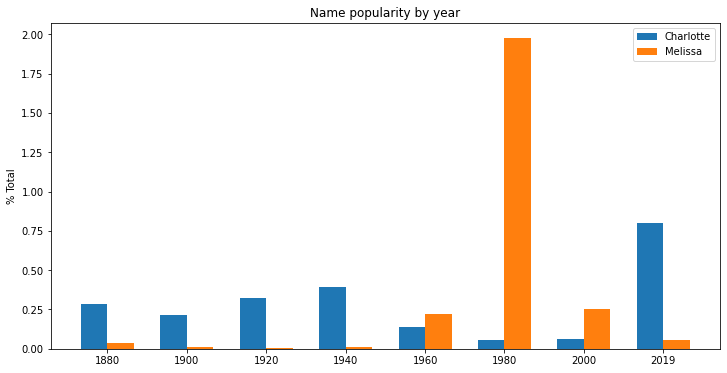

In [25]:
nameCountBarChart(dfs,['Charlotte','Melissa'],value='relative')

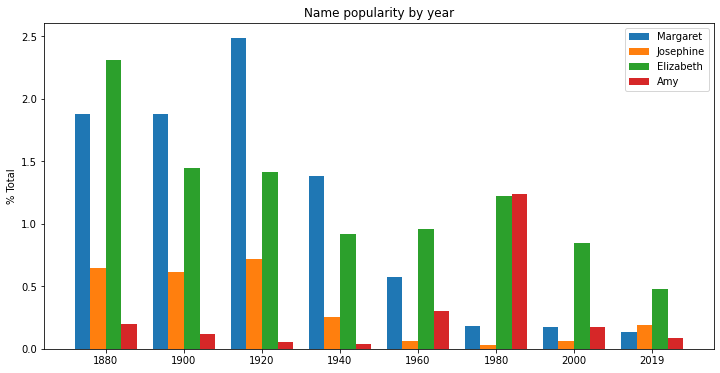

In [26]:
nameCountBarChart(dfs,['Margaret','Josephine','Elizabeth','Amy'],value='relative')

In [27]:
dfs[7][dfs[7]['name']=='Aria']

,name,s,count
18,Aria,F,7072


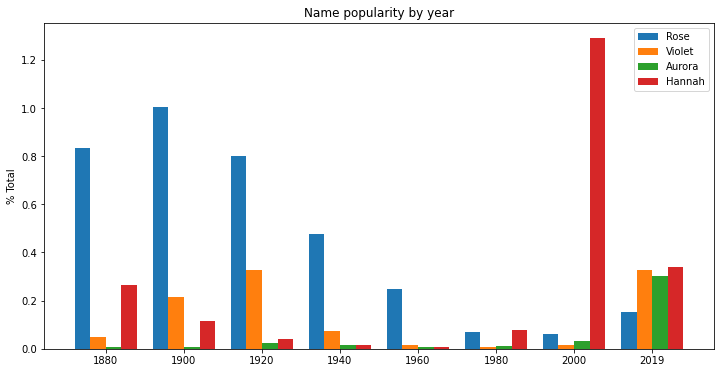

In [28]:
nameCountBarChart(dfs,['Rose','Violet','Aurora','Hannah'],value='relative')

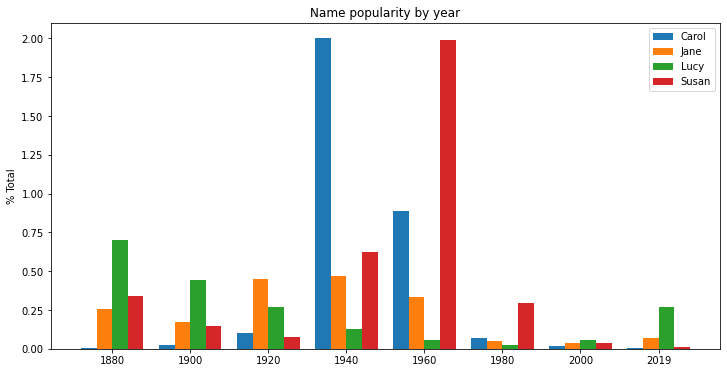

In [29]:
nameCountBarChart(dfs,['Carol','Jane','Lucy','Susan'],value='relative')

## Boy Names

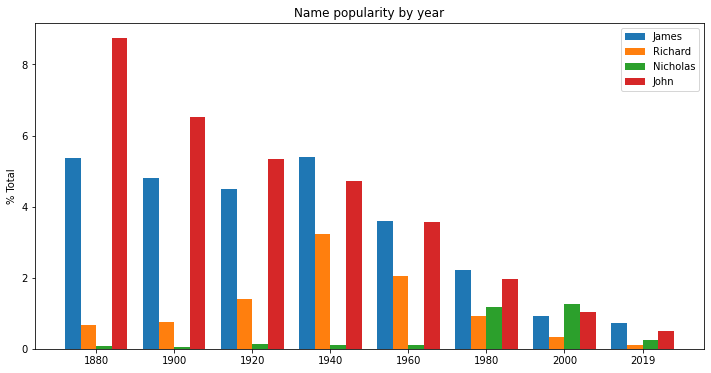

In [30]:
nameCountBarChart(dfsM,['James','Richard','Nicholas','John'],value='relative')

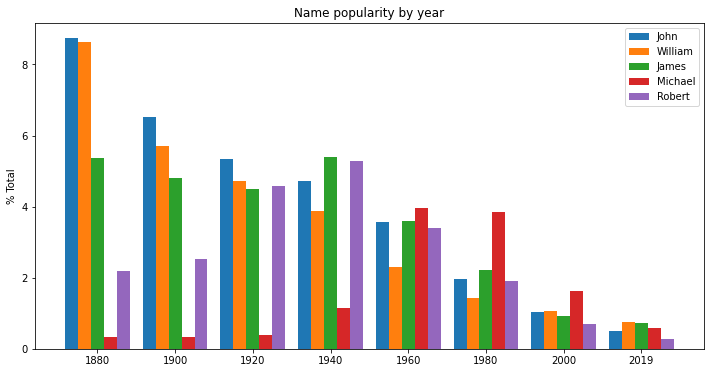

In [31]:
nameCountBarChart(dfsM,['John','William','James','Michael','Robert'],value='relative')

In [32]:
dfsM[0][dfsM[0]['name']=='John']

,name,s,count
941,John,M,9655


In [33]:
dfsM[7][dfsM[7]['name']=='John']

,name,s,count
17931,John,M,8779


In [34]:
dfsM[4]

,name,s,count
7330,David,M,85930
7331,Michael,M,84177
7332,James,M,76828
7333,John,M,76088
7334,Robert,M,72358
...,...,...,...
11919,Yates,M,5
11920,Ysabel,M,5
11921,Yusuf,M,5
11922,Zalmen,M,5
